# A. Предсказание движения беспилотного автомобиля

Когда в XIX веке на улицах Великобритании появились первые самоходные повозки, они вызвали у людей скорее страх и недоверие, чем восторг. Поэтому в 1865 году в Великобритании был принят The Locomotive Act, более известный как Red Flag Act, который требовал, чтобы перед каждым автомобилем шёл человек с красным флажком или фонарём. Этот «предвестник прогресса» должен был предупреждать пешеходов и конные экипажи о приближении нового механического транспорта.

Кроме того, закон строго ограничивал скорость автомобилей: не более 2 миль в час в городах и 4 миль в час за их пределами. Эти меры были направлены на то, чтобы адаптировать общество к новым транспортным средствам и минимизировать их риски для безопасности. К концу XIX века стало очевидно, что подобные ограничения только сдерживают прогресс, и в 1896 году Red Flag Act был отменён, а автомобили получили право двигаться быстрее и без «предвестника», предсказывающего появление автомобиля.

Сегодня предсказание маршрута автомобиля стало делом не человека с флажком, а искусственного интеллекта. ИИ способен опираться на огромное количество данных — от состояния дорог и трафика до погодных условий и угла поворота колёс — чтобы не просто направить автомобиль, а выбрать для него наилучший маршрут.

Ваша задача — обучить модель, позволяющую точно моделировать траекторию движения автомобиля на основе поступающих команд управления, технических характеристик и исторических данных о прошлых проездах транспорта по различным дорогам.

## Данные для обучения
Архив YaCupTrain.tar содержит набор из N train записанных сцен проезда легкового автомобиля, разложенных по отдельным папкам. Каждая папка содержит 3 файла:

- metadata.json: содержит общую информацию про сцену
- ride_date — дата проезда
- vehicle_id — уникальный идентификатор автомобиля
- vehicle_model — идентификатор модели автомобиля
- vehicle_model_modification — идентификатор модификации указанной модели автомобиля
- tires — идентификатор типа шин, используемых для колёс передней (front) и задней (rear) оси автомобиля
- location_reference_point_id — идентификатор референсной точки, используемой в качестве начала отсчёта координат в файле localization.csv
- localization.csv: описывает траекторию движения автомобиля на данной 60-секундной сцене. Представляет собой csv файл, каждая строчка которого имеет формат
stamp_ns — время в наносекундах от начала сцены
x, y, z — координаты центра задней оси автомобиля. Считаются в метрах от указанной референсной точки сцены. Направления осей относительно референсной точки: 
x - на восток, 
y - на север, 
z - в небо
roll, pitch, yaw — углы Эйлера в радианах, описывающие ориентацию автомобиля в пространстве. Угол yaw считается относительно оси 
x в направлении оси y.
- control.csv: описывает последовательность команд управления, отправленных автомобилю на протяжении данной сцены.
- stamp_ns — время в наносекундах от начала сцены
- acceleration_level — желаемая интенсивность ускорения. Положительные значения соответствуют силе нажатия на педаль газа, отрицательные — силе нажатия на педаль тормоза
- steering — желаемый угол поворота руля в градусах относительно центрального положения
Обратите внимание, что диапазон значений acceleration_level зависит от модели автомобиля. Также, важно отметить, что данные команды описывают желаемое целевое состояние элементов управления в указанный момент времени, и не обязательно исполняются мгновенно.

## Данные для тестирования
Архив YaCupTest.tar содержит набор из N test    сцен, для которых требуется предсказать новую траекторию автомобиля на основе начального состояния и поступающих команд управления. Каждая папка с тестовым сценарием содержит 4 файла:

- metadata.json: содержит общую информацию про сцену аналогично обучающим данным
- localization.csv: описывает траекторию движения автомобиля в течении первых 5 секунд сцены. Формат аналогичен обучающим данным.
- control.csv: описывает последовательность команд управления в течении первых 20 секунд сцены. Формат аналогичен обучающим данным.
- requested_stamps.csv: содержит одну колонку stamp_ns, содержащую список из T n  моментов времени от начала сцены (в наносекундах) в интервале с 5 по 20 секунду, для которых требуется предсказать положение автомобиля.

## Формат вывода
В качестве решения вам необходимо отправить один файл в формате *.csv, содержащий следующие 5 колонок:

- testcase_id — номер сцены из тестового набора (имя папки от 0 до N test −1)
- stamp_ns — моменты времени из соответствующего файла requested_stamps.csv тестовой сцены.
- x, y, yaw — 3 колонки с предсказанными координатами положения машины и её ориентации на плоскости в указанные моменты времени (В формате аналогичном входным данным).
Таким образом, общее количество строк с предсказаниями в файле с ответом должно совпадать с суммарным количеством таймстемпов в файлах requested_stamps.csv.

- x, y, yaw target

## Calculate metric

Let's describe final metric. As a first step, all predicted triples $(x,y,yaw)$ are being converted into 2 points $[(x_1, y_1), (x_2, y_2)]$ in the following way:
$$
(x_1, y_1) = (x, y), \\
(x_2, y_2) = (x_1, y_1) + S \times (yaw_x, yaw_y)
$$  

where $S = 1$. In other words, we build a directed segment of length $1$. These points then used in the metric calculation.


Metric for a single pose (rmse):

$$
pose\_metric = \sqrt{ \frac{\displaystyle\sum_{j=1}^{k} {(x_j-\hat{x_j})^2 + (y_j-\hat{y_j})^2}}{k} }
$$

where $k$ - number of points that describe single pose (in our case $k=2$).

Metric for a testcase:

$$
testcase\_metric = \frac{1}{n}  \displaystyle\sum_{i=1}^{n}pose\_metric_i
$$

where $n$ - number of localization points to predict.

And, final metric for a whole dataset:

$$
dataset\_metric = \frac{1}{n}  \displaystyle\sum_{i=1}^{n}testcase\_metric_i
$$

where $n$ - number of test cases.


## Import libraries

In [1]:
import json
import pandas as pd
import os
import sklearn
import datetime
import numpy as np

from pprint import pprint

import clickhouse_connect

from pydantic import BaseModel, Field
from typing import List, Dict, Any, Optional

# eda

import phik


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# time
from time import sleep
from datetime import datetime as dt
import pytz

# ml
import xgboost as xgb
import catboost as ctb

import optuna
from optuna.visualization.matplotlib import plot_param_importances

import mlflow


# mlflow.set_experiment('price_meas23_pred')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline as skl_pipeline

from sklearn.base import BaseEstimator, TransformerMixin

# from imblearn.pipeline import Pipeline as imb_pipeline
# from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, OrdinalEncoder, StandardScaler, RobustScaler

sklearn.set_config(transform_output='pandas')

# load metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

from dotenv import load_dotenv
load_dotenv()

# set all columns to be displayed
pd.set_option('display.max_columns', None)

# import tools

from tools import pd_tools
from tools import spark_tools
from tools.create_db_table_from_df import sql_create_table_from_pd


root_path = "."
tmp_path = f'{root_path}/tmp'
data_path = f'{root_path}/data/self-drive'
data_train_path = f'{data_path}/train_data'
data_test_path = f'{data_path}/test_data'
tmp_data_path=f'{data_path}/tmp_data'

# constants
CH_USER = os.getenv("CH_USER")
CH_PASS = os.getenv("CH_PASS")
CH_IP = os.getenv('CH_IP')
RAND_ST = 354
# MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

your_mlflow_tracking_uri = f'{root_path}/mlruns' # for docker mlflow server
# your_mlflow_tracking_uri = "http://127.0.0.1:5000" # for local mlflow server
# your_mlflow_tracking_uri = MLFLOW_TRACKING_URI # for remote mlflow server
mlflow.set_tracking_uri(your_mlflow_tracking_uri)


ch_client = clickhouse_connect.get_client(host=CH_IP, port=8123, username=CH_USER, password=CH_PASS)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


## Data load

In [2]:
# read folder names in path
def read_names(path: str):
    '''Read folder names or file names in the path'''
    return os.listdir(path)

train_ids = pd.Series(read_names(data_train_path)).apply(int)
test_ids = pd.Series(read_names(data_test_path)).apply(int)
train_ids = train_ids.sort_values().reset_index(drop=True)
train_ids



0            0
1            1
2            2
3            3
4            4
         ...  
41995    41995
41996    41996
41997    41997
41998    41998
41999    41999
Length: 42000, dtype: int64

### Create functions for load data

In [3]:
def make_sp_df_id(control:pd.DataFrame, localization:pd.DataFrame, metadata:pd.DataFrame) -> pd.DataFrame:
    '''Make a model spark dataframe for from control, localization and metadata dataframes for a single id'''

    def find_min_max(control:pd.DataFrame, localization:pd.DataFrame):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        control['loc_stamp_max'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] >= x]['stamp_ns'].min())
        control['loc_stamp_min'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] < x]['stamp_ns'].max())
        control_2m = control.copy()
        return control_2m

    def merge_min_max(control_2m:pd.DataFrame, localization:pd.DataFrame):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        control_3m = (control_2m.merge(localization, left_on='loc_stamp_max', right_on='stamp_ns', how='left', suffixes=('', '_max'))
                    .merge(localization, left_on='loc_stamp_min', right_on='stamp_ns', how='left', suffixes=('', '_min'))
        )
        control_3m.rename(columns={'x':'x_max', 'y':'y_max', 'z':'z_max', 'roll':'roll_max', 'pitch':'pitch_max', 'yaw':'yaw_max'}, inplace=True)
        control_3m.drop(columns=['loc_stamp_max', 'loc_stamp_min'], inplace=True)
        return control_3m

    def interpolate_coords(control_3m, col_min:str, col_max:str):
        '''Interpolate values between max and min values'''
        control_inter = (control_3m[['stamp_ns', 'stamp_ns_max', 'stamp_ns_min', col_min, col_max]]
                    .apply(lambda x: (x['stamp_ns'] - x['stamp_ns_min']) / (x['stamp_ns_max'] - x['stamp_ns_min']) * (x[col_max] - x[col_min]) + x[col_min], axis=1)
                    )
        return control_inter

    control_2m = find_min_max(control, localization)
    control_3m = merge_min_max(control_2m, localization)

    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    contr_cols = ['stamp_ns', 'acceleration_level', 'steering']

    for col in coords_cols:
        control_3m[col] = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')

    control_inter = control_3m[contr_cols + coords_cols]


    def tires_to_columns_date(metadata:pd.DataFrame):
        '''Change tires column to front and rear columns and 
        convert ride_date to datetime and add year, month, day columns'''
        metadata['front_tire'] = metadata['tires'][0]
        metadata['rear_tire'] = metadata['tires'][1]
        metadata = metadata.drop(columns=['tires']).reset_index(drop=True).loc[:0]
        # convert ride_date to datetime and add year, month, day columns
        metadata['ride_date'] = pd.to_datetime(metadata['ride_date'])
        metadata['ride_year'] = metadata['ride_date'].dt.year
        metadata['ride_month'] = metadata['ride_date'].dt.month
        metadata['ride_day'] = metadata['ride_date'].dt.day
        metadata = metadata.drop(columns=['ride_date'])
        
        return metadata

    # add metada to each row in control dataframe
    def add_metadata(control:pd.DataFrame, metadata:pd.DataFrame):
        '''Add metada to each row in control dataframe'''
        # Make a copy to avoid SettingWithCopyWarning
        control_model = control.copy()
        for col in metadata.columns:
            control_model[col] = metadata.loc[0, col]  # Set the entire column in the copy
        
        return control_model


    
    metadata_m = tires_to_columns_date(metadata)
 
    control_model = add_metadata(control_inter, metadata_m)

    return control_model


In [10]:
# read data in each file with spark
def make_df_all_ids(path: str, ids: pd.Series, files: list) -> pd.DataFrame:
    '''Read data in each file with spark'''
    data = []
    for i in ids:
        for file in files:
            if file == 'control.csv':
                control = pd.read_csv(f'{path}/{i}/{file}')
            elif file == 'localization.csv':
                localization = pd.read_csv(f'{path}/{i}/{file}')
            elif file == 'metadata.json':
                metadata = pd.read_json(f'{path}/{i}/{file}')

        clm = make_sp_df_id(control, localization, metadata)
        clm['id'] = i

        # add acceleration_level and steering columns with shifts
        for col in ['acceleration_level', 'steering']:
            for i in range(1, 4):
                clm[f'{col}_shift_{i}'] = clm[col].shift(i)
  
        # add x, y, yaw columns with shifts
        for col in ['x', 'y', 'yaw']:
            for i in range(1, 4):
                clm[f'{col}_shift_{i}'] = clm[col].shift(i)

        # add mean last 10 values for acceleration_level and steering columns
        for col in ['acceleration_level', 'steering']:
            clm[f'{col}_last_10_mean'] = clm[col].rolling(window=10).mean()

        # add mean last 10 values for x, y, yaw columns
        for col in ['x', 'y', 'yaw']:
            clm[f'{col}_last_10_mean'] = clm[col].rolling(window=10).mean()


        data.append(clm)
    
    # Concatenate all DataFrames from the list
    data_clm = pd.concat(data, ignore_index=True)
     
    return data_clm

In [15]:
ids = train_ids[:10]
files = ['control.csv', 'localization.csv', 'metadata.json']
data_clm = make_df_all_ids(data_train_path, ids, files)
data_clm.head()

,stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
0,2987440736,-114,-2.655140,-4305.325027,-14560.800637,67.786293,0.002836,-0.048921,-1.945764,0,0,0,0,0,0,2022,3,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3027341070,-123,-2.598169,-4305.489155,-14561.217631,67.808224,0.002993,-0.049162,-1.945839,0,0,0,0,0,0,2022,3,14,0,-114.0,NaN,NaN,-2.655140,NaN,NaN,-4305.325027,NaN,NaN,-14560.800637,NaN,NaN,-1.945764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3066793076,-132,-2.544422,-4305.652097,-14561.630123,67.833736,0.005068,-0.049696,-1.945933,0,0,0,0,0,0,2022,3,14,0,-123.0,-114.0,NaN,-2.598169,-2.655140,NaN,-4305.489155,-4305.325027,NaN,-14561.217631,-14560.800637,NaN,-1.945839,-1.945764,NaN,NaN,NaN,NaN,NaN,NaN
3,3106757146,-141,-2.544422,-4305.815555,-14562.044470,67.857731,0.006305,-0.050110,-1.946037,0,0,0,0,0,0,2022,3,14,0,-132.0,-123.0,-114.0,-2.544422,-2.598169,-2.655140,-4305.652097,-4305.489155,-4305.325027,-14561.630123,-14561.217631,-14560.800637,-1.945933,-1.945839,-1.945764,NaN,NaN,NaN,NaN,NaN
4,3146784622,-147,-2.488557,-4305.979063,-14562.457108,67.880212,0.007713,-0.049996,-1.946176,0,0,0,0,0,0,2022,3,14,0,-141.0,-132.0,-123.0,-2.544422,-2.544422,-2.598169,-4305.815555,-4305.652097,-4305.489155,-14562.044470,-14561.630123,-14561.217631,-1.946037,-1.945933,-1.945839,NaN,NaN,NaN,NaN,NaN


In [ ]:
# add shift

In [16]:
data_clm.to_parquet(f'{tmp_data_path}/self_driving.parquet', index=False)



In [17]:
pd.read_parquet(f'{tmp_data_path}/self_driving.parquet').head()


,stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
0,2987440736,-114,-2.655140,-4305.325027,-14560.800637,67.786293,0.002836,-0.048921,-1.945764,0,0,0,0,0,0,2022,3,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3027341070,-123,-2.598169,-4305.489155,-14561.217631,67.808224,0.002993,-0.049162,-1.945839,0,0,0,0,0,0,2022,3,14,0,-114.0,NaN,NaN,-2.655140,NaN,NaN,-4305.325027,NaN,NaN,-14560.800637,NaN,NaN,-1.945764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3066793076,-132,-2.544422,-4305.652097,-14561.630123,67.833736,0.005068,-0.049696,-1.945933,0,0,0,0,0,0,2022,3,14,0,-123.0,-114.0,NaN,-2.598169,-2.655140,NaN,-4305.489155,-4305.325027,NaN,-14561.217631,-14560.800637,NaN,-1.945839,-1.945764,NaN,NaN,NaN,NaN,NaN,NaN
3,3106757146,-141,-2.544422,-4305.815555,-14562.044470,67.857731,0.006305,-0.050110,-1.946037,0,0,0,0,0,0,2022,3,14,0,-132.0,-123.0,-114.0,-2.544422,-2.598169,-2.655140,-4305.652097,-4305.489155,-4305.325027,-14561.630123,-14561.217631,-14560.800637,-1.945933,-1.945839,-1.945764,NaN,NaN,NaN,NaN,NaN
4,3146784622,-147,-2.488557,-4305.979063,-14562.457108,67.880212,0.007713,-0.049996,-1.946176,0,0,0,0,0,0,2022,3,14,0,-141.0,-132.0,-123.0,-2.544422,-2.544422,-2.598169,-4305.815555,-4305.652097,-4305.489155,-14562.044470,-14561.630123,-14561.217631,-1.946037,-1.945933,-1.945839,NaN,NaN,NaN,NaN,NaN


## EDA

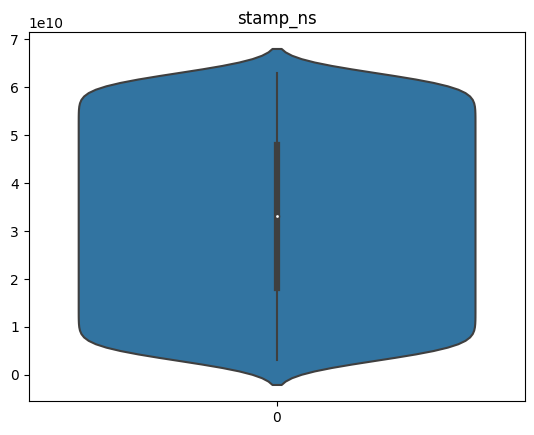

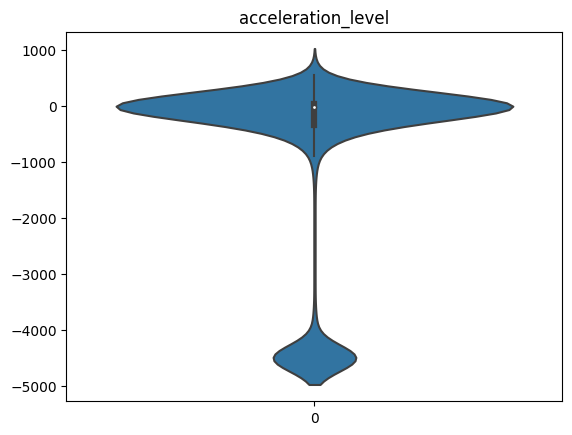

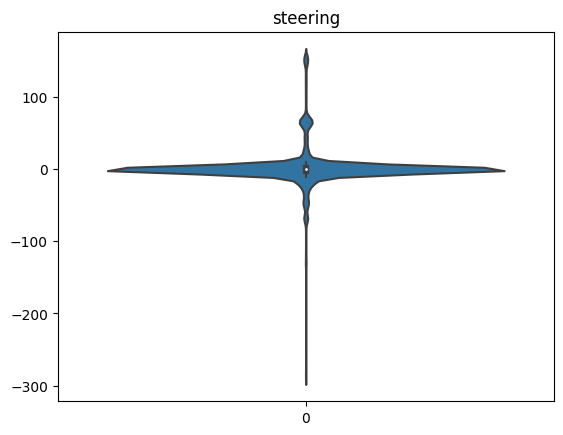

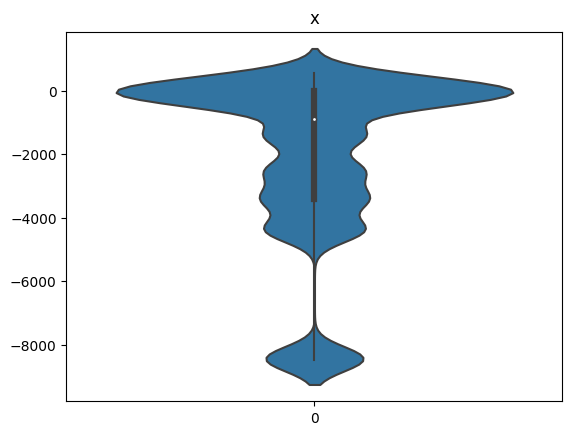

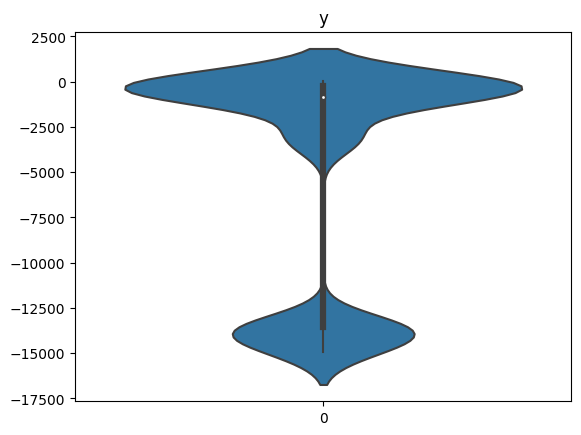

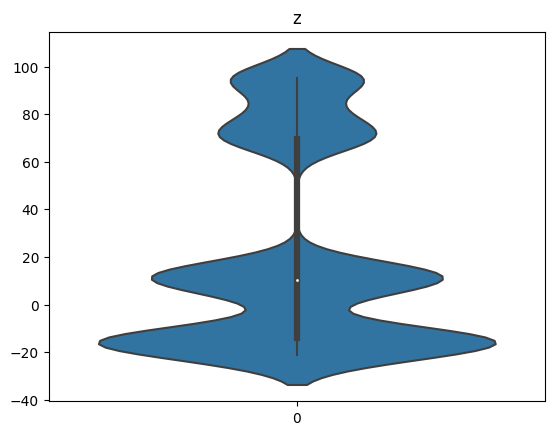

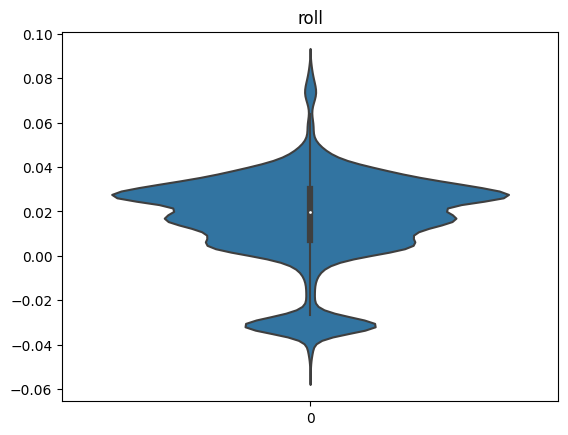

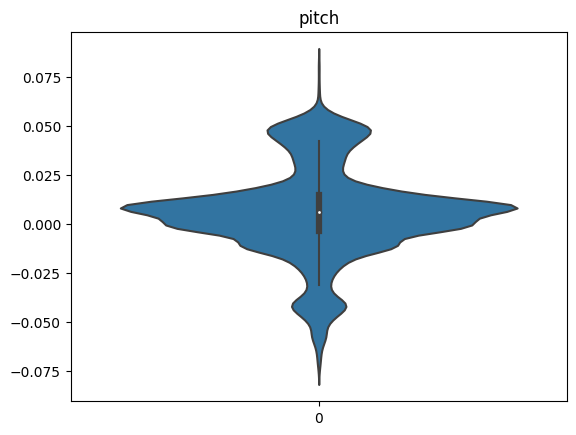

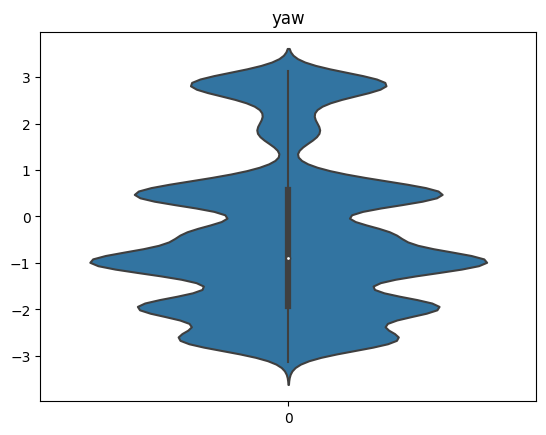

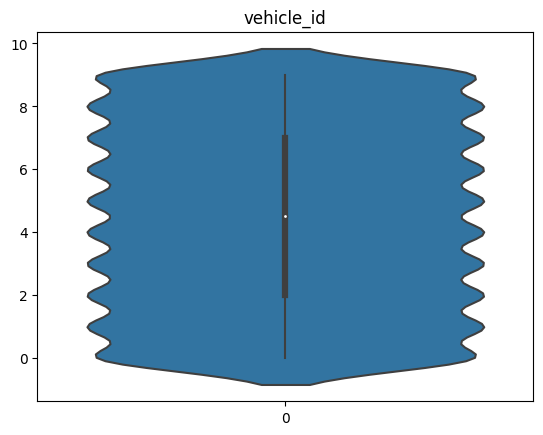

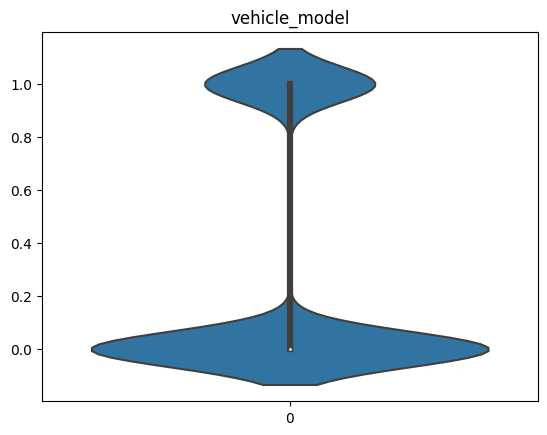

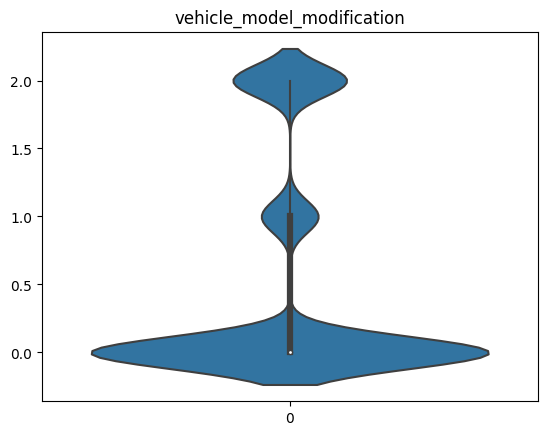

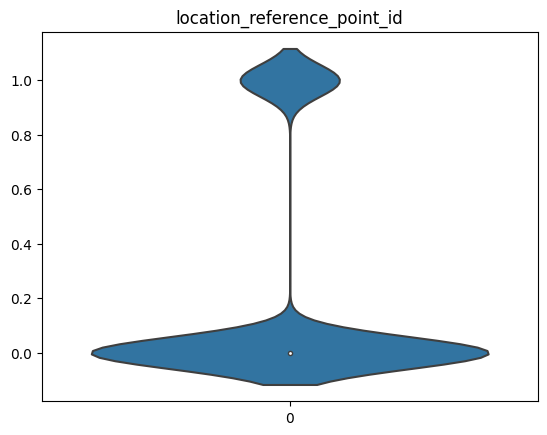

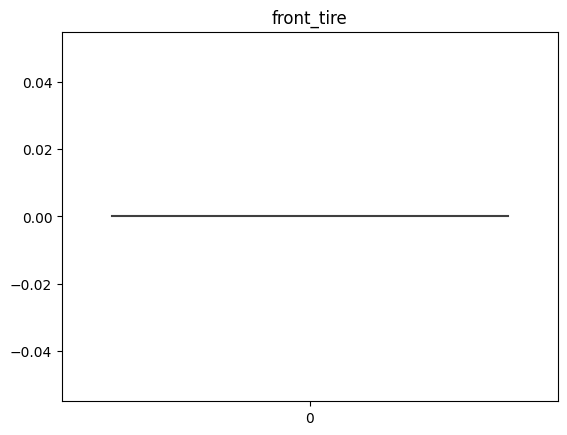

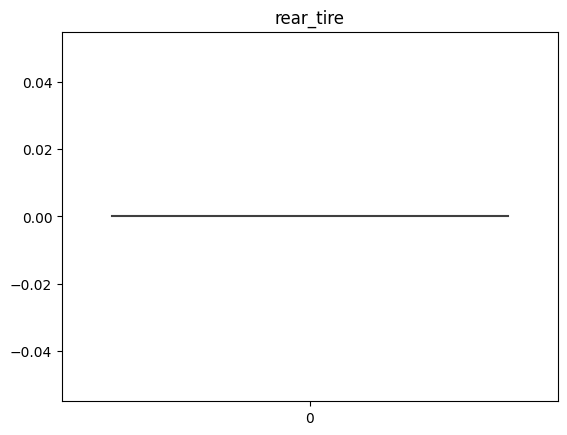

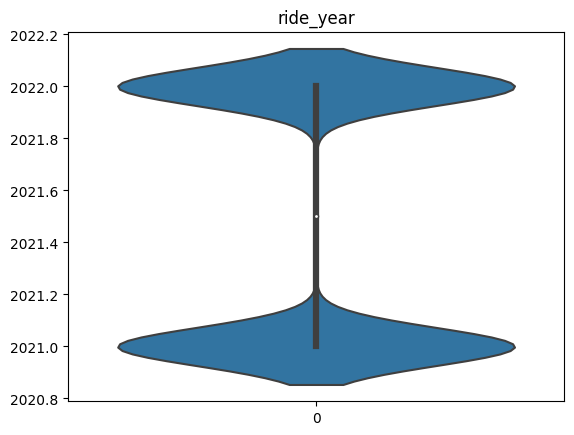

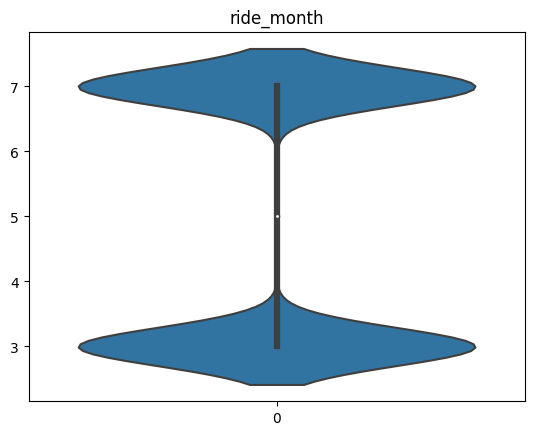

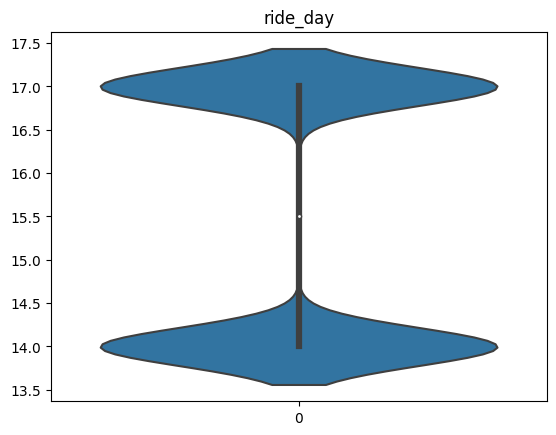

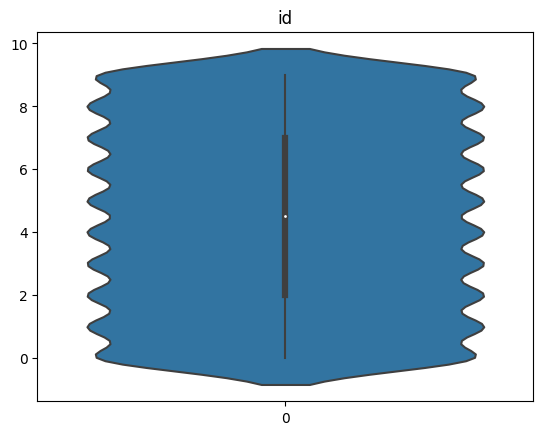

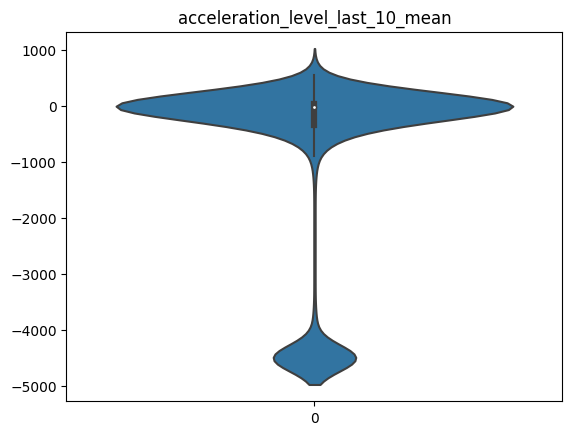

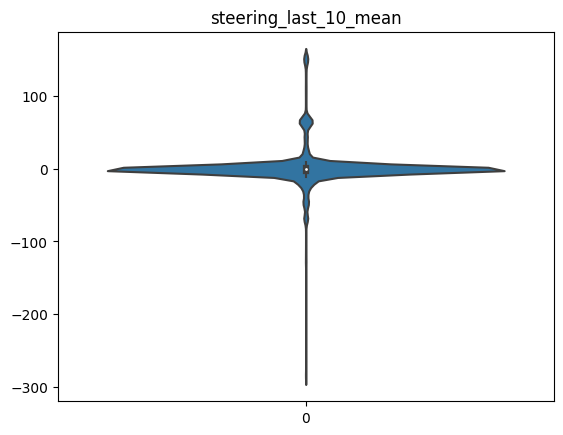

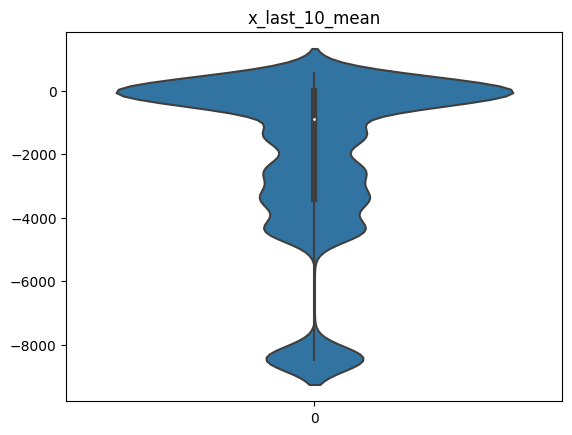

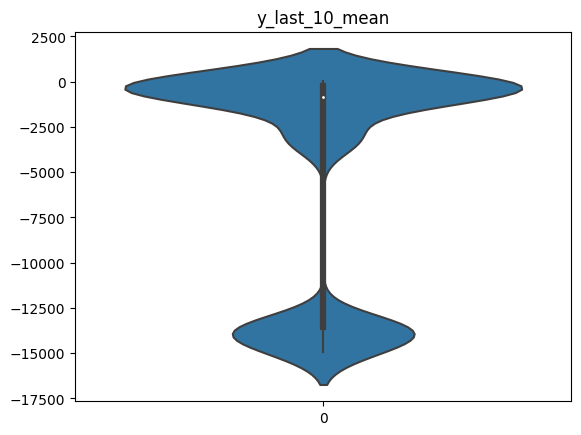

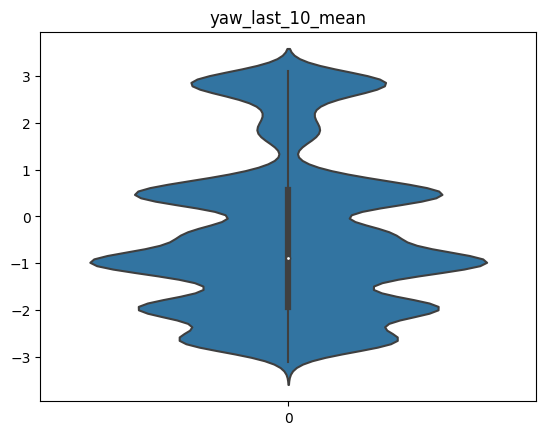

In [ ]:
for col in data_clm.columns:
    # show only original columns
    if not 'shift' in col or 'last_10_mean' in col:
        sns.violinplot(data=data_clm[col])
        plt.title(col)
        plt.show()


## Train test split

In [40]:
data_train.show(5), data_test.show(5), data_train.count(), data_test.count()

+-----------+------------------+------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+---+
|   stamp_ns|acceleration_level|          steering|                  x|                  y|                  z|                roll|               pitch|                yaw|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day| id|
+-----------+------------------+------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+---+
|21595495932|               -24|-9.943722494064565|-1429.6877476091222|-1

+-----------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+---+
|   stamp_ns|acceleration_level|           steering|                  x|                  y|                  z|                roll|               pitch|                yaw|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day| id|
+-----------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+---+
|21674773676|               -30| -9.311088097203346|-1429.469327834987

(None, None, 12019, 2981)

In [ ]:
# not_target = ['z', 'roll', 'pitch', 'id']

# train_features = data_all_train.drop(*not_target, 'x', 'y', 'yaw')
# test_features = data_all_test.drop(*not_target, 'x', 'y', 'yaw')

# concat features and target for use in catboost spark
# train_features_target_x = data_all_train.drop(*not_target, 'y', 'yaw')
# test_features_target_x = data_all_test.drop(*not_target, 'y', 'yaw')

# train_features_target_y = data_all_train.drop(*not_target, 'x', 'yaw')
# test_features_target_y = data_all_test.drop(*not_target, 'x', 'yaw')

# train_features_target_yaw = data_all_train.drop(*not_target, 'x', 'y')
# test_features_target_yaw = data_all_test.drop(*not_target, 'x', 'y')

## Make pipeline for each target

In [17]:
class YeoJohnsonTransformer(Transformer, HasInputCol, HasOutputCol):
    """
    A custom transformer for applying the Yeo-Johnson transformation to specified columns in a PySpark DataFrame.
    """

    def __init__(self, inputCols=None, outputCols=None, lmbda=0):
        super(YeoJohnsonTransformer, self).__init__()
        self.inputCols = inputCols
        self.outputCols = outputCols
        self.lmbda = Param(self, "lmbda", "The lambda parameter for Yeo-Johnson transformation")
        self._setDefault(lmbda=0)  # Setting a default value for lambda
        self.setParams(inputCols=inputCols, outputCols=outputCols, lmbda=lmbda)

    def setParams(self, inputCols=None, outputCols=None, lmbda=0):
        if inputCols is not None:
            self.inputCols = inputCols
        if outputCols is not None:
            self.outputCols = outputCols
        self._set(lmbda=lmbda)
        return self

    def _transform(self, dataset):
        lmbda = self.getOrDefault(self.lmbda)  # Retrieve lambda using Param
        input_cols = self.inputCols
        output_cols = self.outputCols

        if len(input_cols) != len(output_cols):
            raise ValueError("The number of input columns must match the number of output columns.")

        def yeo_johnson(x):
            # Apply the Yeo-Johnson transformation for a single value
            if lmbda == 0:
                return np.log(x + 1)
            else:
                return ((x + 1) ** lmbda - 1) / lmbda

        yeo_johnson_udf = F.udf(yeo_johnson, DoubleType())
        
        # Apply transformation for each input-output column pair
        for input_col, output_col in zip(input_cols, output_cols):
            dataset = dataset.withColumn(output_col, yeo_johnson_udf(F.col(input_col)))
        
        return dataset


In [47]:
def pipeline_spark_catboost(train:SparkDataFrame, test:SparkDataFrame, label:str):
    '''Create a spark pipeline for catboost model'''
    # set features cols
    cat_cols = [
        'front_tire'
        ,'rear_tire'
        ,'vehicle_id'
        ,'vehicle_model'
        ,'vehicle_model_modification'
        ,'location_reference_point_id'
        ,'ride_year'
        ,'ride_month'
        ,'ride_day'
        ]
    num_cols = [
        'stamp_ns'
        ,'acceleration_level'
        ,'steering' 
        ]


    # Assuming numeric_cols are the names of your numeric columns
    # StandardScaler for numeric columns

    # preprocessor

    input_columns = num_cols
    output_columns = [f'{col}_transformed' for col in num_cols]

    #yeo_johnson custom transformer analog to PowerTransformer in sklearn
    yeo_johnson = YeoJohnsonTransformer(
        inputCols=input_columns
        ,outputCols=output_columns
        ,lmbda=0.5
    )

    # Initialize transformer
    yeo_johnson_transformer = YeoJohnsonTransformer(
        inputCols=input_columns
        ,outputCols=output_columns
        ,lmbda=0.5
    )



    # VectorAssembler is used to combine all transformed features into a single feature vector required by Spark MLlib for model training.
    # Assemble all features into a single vector
    assembler = spk_VectorAssembler(
        inputCols=cat_cols + num_cols,# change to output columns
        outputCol="features"
    )


    # Full preprocessing pipeline
    preprocessing_pipeline = spk_pipeline(stages=[
        # yeo_johnson_transformer
        assembler])



    # Fit and transform the data
    preprocessor = preprocessing_pipeline.fit(train)
    train_data_transformed = preprocessor.transform(train)
    test_data_transformed = preprocessor.transform(test)
     

    # Create a CatBoostRegressor model

    ctb_reg = spk_CatBoostRegressor(
        iterations=100
        ,depth=6
        ,lossFunction='RMSE'
        ,evalMetric='RMSE'    
        ,featuresCol='features'
        ,labelCol=f'{label}'

    )


    # model = ctb_reg.fit(train_data_transformed, evalDatasets = test_data_transformed)

    model = ctb_reg.fit(train_data_transformed)

    # Evaluate the model separately on the test data
    # evaluator = spk_RegressionEvaluator(
    #     labelCol="x",
    #     predictionCol="prediction",
    #     metricName="rmse"
    # )
    # rmse = evaluator.evaluate(predictions)


    return model, preprocessor


In [48]:
labels = ['x', 'y', 'yaw']

# set experiment for x label
for label in [labels[0]]:
    mlflow.set_experiment(f'self_drive_label_{label}')

    not_target = ['z', 'roll', 'pitch', 'id']
    drop_cols = [item for item in [*not_target, 'y', 'yaw', 'x'] if item != f'{label}']

    # union features and target for use in catboost spark
    train_features_target = data_train.drop(*drop_cols)
    test_features_target = data_test.drop(*drop_cols)

    model, preprocessor = pipeline_spark_catboost(train_features_target, test_features_target, label)

[CatBoost Master] SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
[CatBoost Master] SLF4J: Defaulting to no-operation (NOP) logger implementation
[CatBoost Master] SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


Learning rate set to 0.349637
0:	learn: 2174.9222085	total: 44.4ms	remaining: 4.39s
1:	learn: 1457.0957446	total: 84.1ms	remaining: 4.12s
2:	learn: 980.4049293	total: 119ms	remaining: 3.84s
3:	learn: 683.5427796	total: 154ms	remaining: 3.7s
4:	learn: 508.5163878	total: 190ms	remaining: 3.61s
5:	learn: 357.8608720	total: 225ms	remaining: 3.53s
6:	learn: 261.8613332	total: 258ms	remaining: 3.43s
7:	learn: 208.3791350	total: 292ms	remaining: 3.36s
8:	learn: 165.7326198	total: 326ms	remaining: 3.3s
9:	learn: 139.0506597	total: 360ms	remaining: 3.24s
10:	learn: 117.0645161	total: 395ms	remaining: 3.19s
11:	learn: 102.1945838	total: 428ms	remaining: 3.14s
12:	learn: 89.9860414	total: 459ms	remaining: 3.07s
13:	learn: 80.5344764	total: 498ms	remaining: 3.06s
14:	learn: 73.1971843	total: 540ms	remaining: 3.06s
15:	learn: 67.6570726	total: 584ms	remaining: 3.06s
16:	learn: 62.0774119	total: 622ms	remaining: 3.04s
17:	learn: 57.4330350	total: 674ms	remaining: 3.07s
18:	learn: 53.8493227	total: 7

In [26]:
preprocessor

PipelineModel_ea7e8a223388

In [27]:
model

CatBoostRegressionModel_fd0848021066

In [28]:
test_data_transformed = preprocessor.transform(test_features_target)
predictions = model.transform(test_data_transformed)
predictions.show(5)

+----------+------------------+-------------------+------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+-------------------+
|  stamp_ns|acceleration_level|           steering|                 x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|         prediction|
+----------+------------------+-------------------+------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+-------------------+
|3066793076|              -132|-2.5444222994575325|-4305.652096671342|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...| -4308.517536114145|
|3267384871|              -1

[CatBoost Master] SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
[CatBoost Master] SLF4J: Defaulting to no-operation (NOP) logger implementation
[CatBoost Master] SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


Learning rate set to 0.349637
0:	learn: 2174.9222085	total: 47.6ms	remaining: 4.71s
1:	learn: 1457.0957446	total: 91.7ms	remaining: 4.49s
2:	learn: 980.4049293	total: 129ms	remaining: 4.16s
3:	learn: 683.5427796	total: 164ms	remaining: 3.94s
4:	learn: 508.5163878	total: 203ms	remaining: 3.85s
5:	learn: 357.8608720	total: 237ms	remaining: 3.72s
6:	learn: 261.8613332	total: 279ms	remaining: 3.71s
7:	learn: 208.3791350	total: 319ms	remaining: 3.67s
8:	learn: 165.7326198	total: 359ms	remaining: 3.63s
9:	learn: 139.0506597	total: 403ms	remaining: 3.63s
10:	learn: 117.0645161	total: 451ms	remaining: 3.65s
11:	learn: 102.1945838	total: 506ms	remaining: 3.71s
12:	learn: 89.9860414	total: 555ms	remaining: 3.72s
13:	learn: 80.5344764	total: 609ms	remaining: 3.74s
14:	learn: 73.1971843	total: 654ms	remaining: 3.7s
15:	learn: 67.6570726	total: 693ms	remaining: 3.64s
16:	learn: 62.0774119	total: 730ms	remaining: 3.56s
17:	learn: 57.4330350	total: 764ms	remaining: 3.48s
18:	learn: 53.8493227	total: 

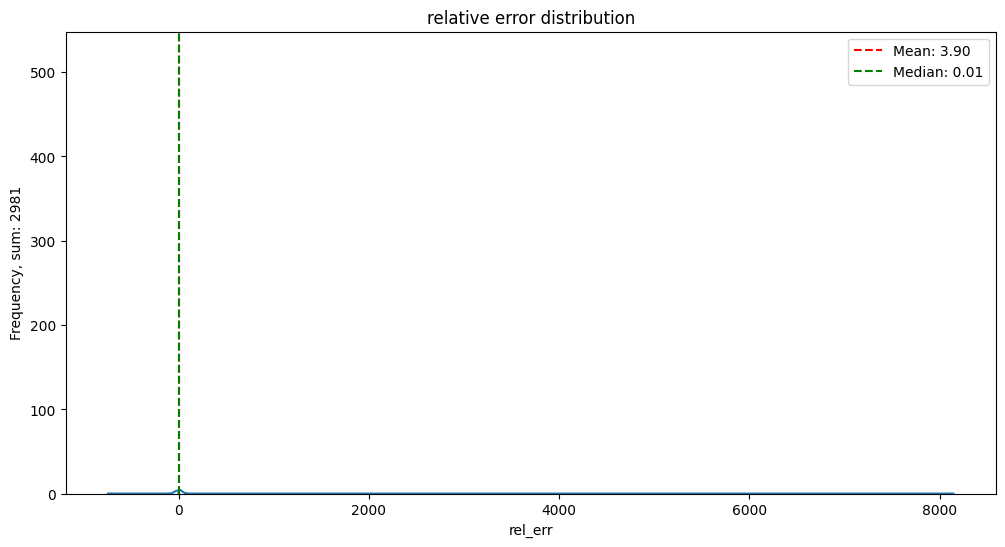

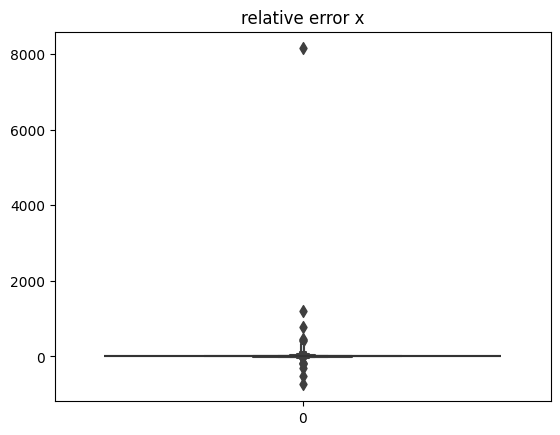

2024/11/02 19:04:19 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpujgcuz5s/model, flavor: spark). Fall back to return ['pyspark==3.4.2']. Set logging level to DEBUG to see the full traceback. 
[CatBoost Master] SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
[CatBoost Master] SLF4J: Defaulting to no-operation (NOP) logger implementation
[CatBoost Master] SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


Learning rate set to 0.349637
0:	learn: 5107.5487731	total: 39ms	remaining: 3.87s
1:	learn: 3382.6485933	total: 75.7ms	remaining: 3.71s
2:	learn: 2265.1423046	total: 115ms	remaining: 3.71s
3:	learn: 1521.5544405	total: 148ms	remaining: 3.54s
4:	learn: 1069.7759861	total: 179ms	remaining: 3.4s
5:	learn: 716.1107639	total: 209ms	remaining: 3.28s
6:	learn: 488.5468409	total: 245ms	remaining: 3.25s
7:	learn: 365.4572143	total: 272ms	remaining: 3.13s
8:	learn: 275.3195861	total: 311ms	remaining: 3.14s
9:	learn: 221.8815482	total: 348ms	remaining: 3.13s
10:	learn: 180.0847785	total: 383ms	remaining: 3.1s
11:	learn: 148.3933771	total: 417ms	remaining: 3.06s
12:	learn: 135.8884319	total: 451ms	remaining: 3.02s
13:	learn: 115.6113165	total: 483ms	remaining: 2.96s
14:	learn: 104.1963757	total: 518ms	remaining: 2.94s
15:	learn: 97.7243942	total: 552ms	remaining: 2.9s
16:	learn: 93.0709963	total: 585ms	remaining: 2.85s
17:	learn: 88.4181359	total: 628ms	remaining: 2.86s
18:	learn: 83.9618743	total

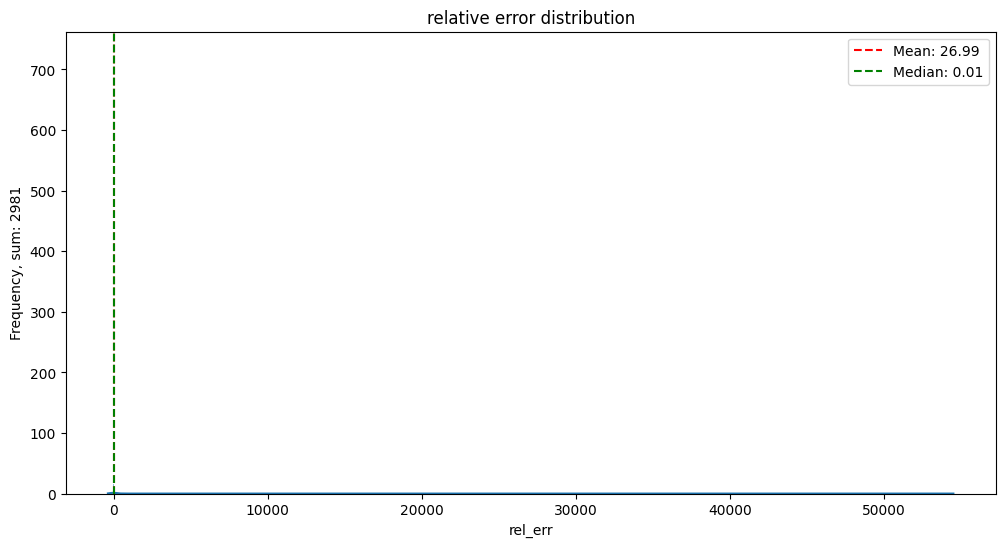

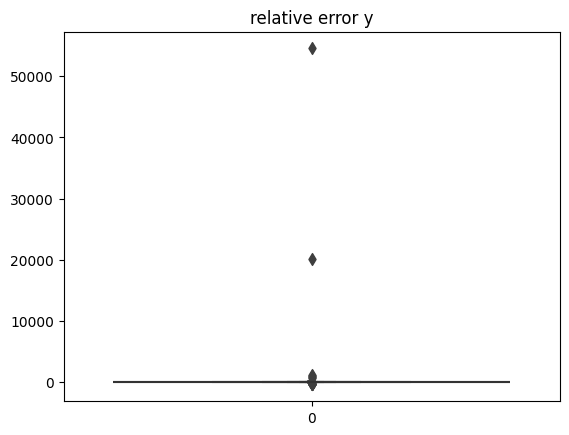

2024/11/02 19:12:44 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmptmnoiokk/model, flavor: spark). Fall back to return ['pyspark==3.4.2']. Set logging level to DEBUG to see the full traceback. 
[CatBoost Master] SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
[CatBoost Master] SLF4J: Defaulting to no-operation (NOP) logger implementation
[CatBoost Master] SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


Learning rate set to 0.349637
0:	learn: 1.1913367	total: 65.7ms	remaining: 6.51s
1:	learn: 0.8941554	total: 130ms	remaining: 6.37s
2:	learn: 0.7301924	total: 189ms	remaining: 6.11s
3:	learn: 0.5802094	total: 244ms	remaining: 5.87s
4:	learn: 0.4590727	total: 292ms	remaining: 5.55s
5:	learn: 0.3888823	total: 343ms	remaining: 5.38s
6:	learn: 0.3411994	total: 394ms	remaining: 5.23s
7:	learn: 0.2928691	total: 446ms	remaining: 5.13s
8:	learn: 0.2743093	total: 513ms	remaining: 5.19s
9:	learn: 0.2482573	total: 564ms	remaining: 5.08s
10:	learn: 0.2390609	total: 622ms	remaining: 5.03s
11:	learn: 0.2226168	total: 677ms	remaining: 4.96s
12:	learn: 0.2097421	total: 736ms	remaining: 4.92s
13:	learn: 0.1964268	total: 795ms	remaining: 4.88s
14:	learn: 0.1909609	total: 858ms	remaining: 4.86s
15:	learn: 0.1853438	total: 936ms	remaining: 4.92s
16:	learn: 0.1684058	total: 1.03s	remaining: 5.02s
17:	learn: 0.1652281	total: 1.13s	remaining: 5.13s
18:	learn: 0.1612613	total: 1.24s	remaining: 5.28s
19:	learn:

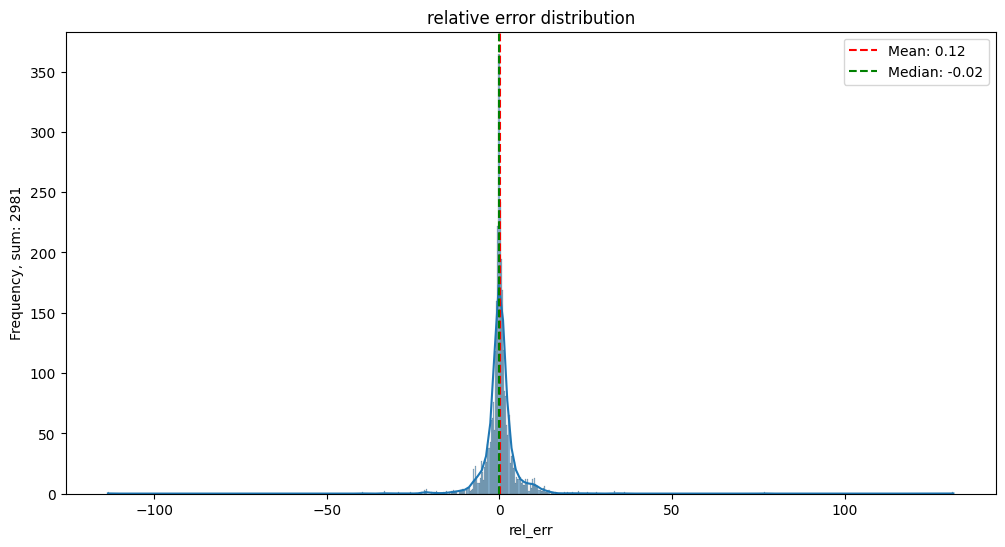

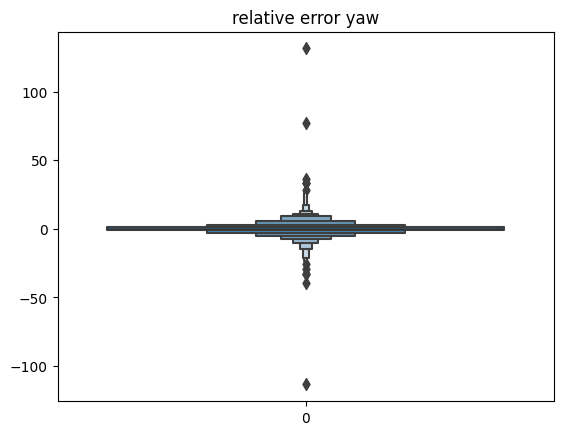

2024/11/02 19:14:18 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpxnrn_475/model, flavor: spark). Fall back to return ['pyspark==3.4.2']. Set logging level to DEBUG to see the full traceback. 


In [49]:
labels = ['x', 'y', 'yaw']

# set experiment for x label
for label in labels:
    mlflow.set_experiment(f'self_drive_label_{label}')

    not_target = ['z', 'roll', 'pitch', 'id']
    drop_cols = [item for item in [*not_target, 'y', 'yaw', 'x'] if item != f'{label}']

    # union features and target for use in catboost spark
    train_features_target = data_train.drop(*drop_cols)
    test_features_target = data_test.drop(*drop_cols)
    
    model, preprocessor = pipeline_spark_catboost(train_features_target, test_features_target, label)

    # Transform the test data
    test_data_transformed = preprocessor.transform(test_features_target)

    # Make predictions
    predictions = model.transform(test_data_transformed.select([f'{label}','features'])).toPandas()
    origin = predictions[f'{label}']
    predicted = predictions['prediction']

    # Calculate relative error
    predictions['rel_err'] = (origin - predicted)/origin * 100
    
    rel_err = predictions['rel_err']

    pd_tools.plot_hist_mm_lines(rel_err, 'relative error')
    plt.savefig(f'{tmp_path}/rel_err_{label}.png')

    sns.boxenplot(data=rel_err)
    plt.title(f'relative error {label}')
    plt.savefig(f'{tmp_path}/rel_err_box_{label}.png')
    plt.show()

    mae = mean_absolute_error(origin, predicted)
    mse = mean_squared_error(origin, predicted)

    metrics = {
        'mae': mae
        ,'mse': mse
        ,'rel_err_median': rel_err.median()
        ,'rel_err_mean': rel_err.mean()
    }

    # set up mlflow run
    with mlflow.start_run(run_name=f'{dt.now().strftime("%Y-%m-%d %H:%M:%S")}'):
        mlflow.log_metrics(metrics)
        mlflow.spark.log_model(model, 'model')
        mlflow.spark.log_model(preprocessor, 'preprocessor')
        mlflow.log_artifact(f'{tmp_path}/rel_err_{label}.png')
        mlflow.log_artifact(f'{tmp_path}/rel_err_box_{label}.png')

In [51]:
model, preprocessor

(CatBoostRegressionModel_6b5f9bf2f2d6, PipelineModel_9bd4e9b189b3)

In [ ]:
train_data = train_features_target_x
test_data = test_features_target_x


In [53]:
def make_sp_df_id(control:pd.DataFrame, localization:pd.DataFrame, metadata:pd.DataFrame) -> pd.DataFrame:
    '''Make a model spark dataframe for from control, localization and metadata dataframes for a single id'''

    def find_min_max(control:pd.DataFrame, localization:pd.DataFrame):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        control['loc_stamp_max'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] >= x]['stamp_ns'].min())
        control['loc_stamp_min'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] < x]['stamp_ns'].max())
        control_2m = control.copy()
        return control_2m

    def merge_min_max(control_2m:pd.DataFrame, localization:pd.DataFrame):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        control_3m = (control_2m.merge(localization, left_on='loc_stamp_max', right_on='stamp_ns', how='left', suffixes=('', '_max'))
                    .merge(localization, left_on='loc_stamp_min', right_on='stamp_ns', how='left', suffixes=('', '_min'))
        )
        control_3m.rename(columns={'x':'x_max', 'y':'y_max', 'z':'z_max', 'roll':'roll_max', 'pitch':'pitch_max', 'yaw':'yaw_max'}, inplace=True)
        control_3m.drop(columns=['loc_stamp_max', 'loc_stamp_min'], inplace=True)
        return control_3m

    def interpolate_coords(control_3m, col_min:str, col_max:str):
        '''Interpolate values between max and min values'''
        control_inter = (control_3m[['stamp_ns', 'stamp_ns_max', 'stamp_ns_min', col_min, col_max]]
                    .apply(lambda x: (x['stamp_ns'] - x['stamp_ns_min']) / (x['stamp_ns_max'] - x['stamp_ns_min']) * (x[col_max] - x[col_min]) + x[col_min], axis=1)
                    )
        return control_inter

    control_2m = find_min_max(control, localization)
    control_3m = merge_min_max(control_2m, localization)

    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    contr_cols = ['stamp_ns', 'acceleration_level', 'steering']

    for col in coords_cols:
        control_3m[col] = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')

    control_inter = control_3m[contr_cols + coords_cols]


    def tires_to_columns_date(metadata:pd.DataFrame):
        '''Change tires column to front and rear columns and 
        convert ride_date to datetime and add year, month, day columns'''
        metadata['front_tire'] = metadata['tires'][0]
        metadata['rear_tire'] = metadata['tires'][1]
        metadata = metadata.drop(columns=['tires']).reset_index(drop=True).loc[:0]
        # convert ride_date to datetime and add year, month, day columns
        metadata['ride_date'] = pd.to_datetime(metadata['ride_date'])
        metadata['ride_year'] = metadata['ride_date'].dt.year
        metadata['ride_month'] = metadata['ride_date'].dt.month
        metadata['ride_day'] = metadata['ride_date'].dt.day
        metadata = metadata.drop(columns=['ride_date'])
        
        return metadata

    # add metada to each row in control dataframe
    def add_metadata(control:pd.DataFrame, metadata:pd.DataFrame):
        '''Add metada to each row in control dataframe'''
        # Make a copy to avoid SettingWithCopyWarning
        control_model = control.copy()
        for col in metadata.columns:
            control_model[col] = metadata.loc[0, col]  # Set the entire column in the copy
        
        return control_model


    
    metadata_m = tires_to_columns_date(metadata)

    # create spark dataframe for model
  
    control_model = add_metadata(control_inter, metadata_m)

    return control_model


In [54]:
control_test = pd.read_csv(f'{data_test_path}/{test_ids[0]}/control.csv')
localization_test = pd.read_csv(f'{data_test_path}/{test_ids[0]}/localization.csv')
metadata_test = pd.read_json(f'{data_test_path}/{test_ids[0]}/metadata.json')
test_data = make_sp_df_id(control_test, localization_test, metadata_test)
test_data.head()

,stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day
0,36479492,-929,5.739836,-1482.652683,-1321.883377,-16.014848,0.027502,-0.001965,2.240336,83,1,1,0,0,0,2021,9,6
1,76459951,-926,5.280618,-1482.766060,-1321.739986,-16.013856,0.027058,-0.001575,2.241208,83,1,1,0,0,0,2021,9,6
2,116678417,-918,5.039505,-1482.878275,-1321.598782,-16.010625,0.027793,-0.001459,2.242181,83,1,1,0,0,0,2021,9,6
3,156788958,-908,4.734873,-1482.990024,-1321.458284,-16.010063,0.027618,-0.001372,2.243131,83,1,1,0,0,0,2021,9,6
4,196857808,-897,4.387096,-1483.100935,-1321.319090,-16.009805,0.028147,-0.001524,2.244003,83,1,1,0,0,0,2021,9,6


In [59]:
control_test_copy = control_test.copy()


In [61]:
control_test_copy['acceleration_level_1'] = control_test_copy['acceleration_level'].shift(1)
control_test_copy['acceleration_level_2'] = control_test_copy['acceleration_level'].shift(-1)
control_test_copy

,stamp_ns,acceleration_level,steering,loc_stamp_max,loc_stamp_min,stamp_ns_1,stamp_ns_2,acceleration_level_1,acceleration_level_2
0,36479492,-929,5.739836,40348560.0,150291,NaN,7.645995e+07,NaN,-926.0
1,76459951,-926,5.280618,80944655.0,40348560,3.647949e+07,1.166784e+08,-929.0,-918.0
2,116678417,-918,5.039505,120251658.0,80944655,7.645995e+07,1.567890e+08,-926.0,-908.0
3,156788958,-908,4.734873,160789649.0,120251658,1.166784e+08,1.968578e+08,-918.0,-897.0
4,196857808,-897,4.387096,200016368.0,160789649,1.567890e+08,2.369750e+08,-908.0,-892.0
...,...,...,...,...,...,...,...,...,...
495,19837060299,5889,-3.057310,NaN,4960859990,1.979711e+10,1.987706e+10,6177.0,5087.0
496,19877059284,5087,-3.112980,NaN,4960859990,1.983706e+10,1.991715e+10,5889.0,4193.0
497,19917145118,4193,-3.112980,NaN,4960859990,1.987706e+10,1.995711e+10,5087.0,3414.0
498,19957108547,3414,-3.183301,NaN,4960859990,1.991715e+10,1.999718e+10,4193.0,2782.0


In [ ]:
test_data_to_predict = test_data.drop(columns=['id', 'x', 'y', 'z', 'roll', 'pitch', 'yaw'])
predict = model.predict(test_data_to_predict.iloc[:125])
test_data.at[125, test_data]

(500, 18)

In [ ]:
# shift for one id 1,2,3 mean for last mean 10 values rolling window may be xgboost or ligbm

In [57]:
test_data.iloc[120:130]

,stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day
120,4836812875,2231,-124.647401,-1490.722037,-1311.158342,-15.928210,-0.002192,-0.000087,2.063613,83,1,1,0,0,0,2021,9,6
121,4876792346,2070,-126.659272,-1490.763621,-1311.080422,-15.928359,-0.001836,0.000698,2.058511,83,1,1,0,0,0,2021,9,6
122,4916874152,1775,-128.660821,-1490.808232,-1310.999860,-15.929814,0.000876,0.002329,2.053368,83,1,1,0,0,0,2021,9,6
123,4956930423,1518,-130.665499,-1490.849900,-1310.920296,-15.930228,0.000498,0.003361,2.048200,83,1,1,0,0,0,2021,9,6
124,4996922070,1170,-132.637306,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6
125,5037032448,817,-134.576668,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6
126,5077164877,507,-136.515770,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6
127,5117145519,247,-138.697052,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6
128,5156218712,133,-140.634862,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6
129,5196284765,-1,-142.669141,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6


In [55]:
test_data.isnull().sum()

stamp_ns                         0
acceleration_level               0
steering                         0
x                              376
y                              376
z                              376
roll                           376
pitch                          376
yaw                            376
vehicle_id                       0
vehicle_model                    0
vehicle_model_modification       0
location_reference_point_id      0
front_tire                       0
rear_tire                        0
ride_year                        0
ride_month                       0
ride_day                         0
dtype: int64

## Metrics Analyze

In [ ]:
predictions = model.transform(test_data_transformed.select(['x','features'])).toPandas()
predictions.head()

,x,features,prediction
0,-4305.652097,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.517536
1,-4306.465474,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
2,-4306.779007,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
3,-4307.701138,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
4,-4308.445435,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4309.996532


In [74]:
origin = predictions['x']
predicted = predictions['prediction']

predictions['rel_err'] = (origin - predicted)/origin * 100


In [79]:
rel_err = predictions['rel_err']
rel_err.describe()

count    2998.000000
mean       -0.351738
std        83.472843
min     -3309.538338
25%        -0.370458
50%         0.004378
75%         0.589034
max      2738.086531
Name: rel_err, dtype: float64

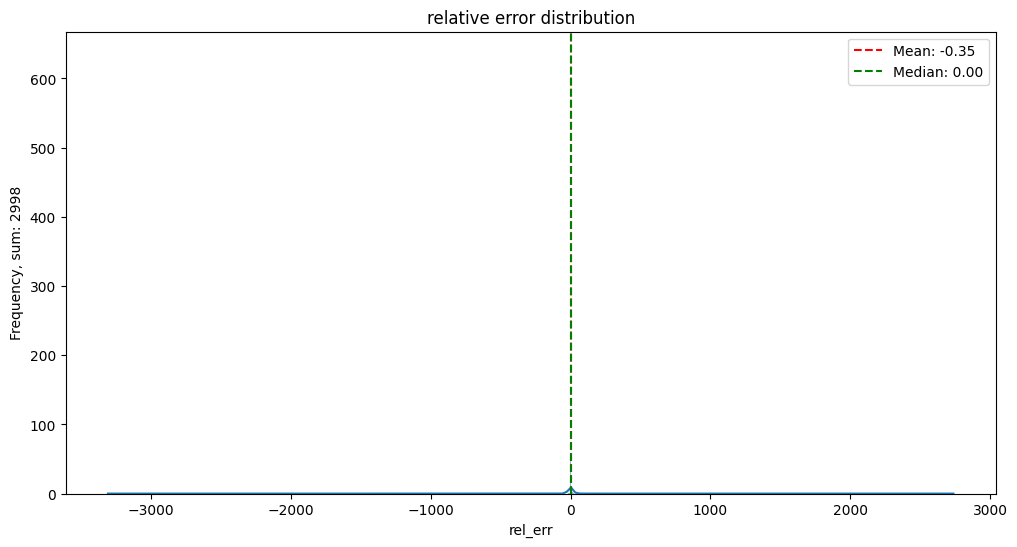

In [78]:
pd_tools.plot_hist_mm_lines(predictions['rel_err'], 'relative error')

In [ ]:
predictions = model.transform(test_data_transformed.select('features', 'x'))
predictions.show(5)

+--------------------+------------------+-------------------+
|            features|             label|         prediction|
+--------------------+------------------+-------------------+
|(12,[6,7,8,9,10,1...|-4305.652096671342| -4308.517536114145|
|(12,[6,7,8,9,10,1...| -4306.46547426193|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4306.779007063473|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4307.701138155361|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4308.445435301533| -4309.996531935143|
+--------------------+------------------+-------------------+
only showing top 5 rows



In [75]:
# Calculate Mean Squared Error
evaluator_mse = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
mse = evaluator_mse.evaluate(predictions)
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="mae")
mae = evaluator_mae.evaluate(predictions)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 8.845634249620122
Mean Absolute Error (MAE): 5.5194811030703095


In [33]:
test_data_transformed.show()

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|3066793076|              -132|-2.5444222994575325| -4305.652096671342|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...|
|3267384871|              -162| -2.382064004182096|  -4306.46547426193|         0|            0|        

In [27]:
train_data_transformed.show(5)

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|2987440736|              -114| -2.655139533023165| -4305.325027045072|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...|
|3027341070|              -123|-2.5981690804828066| -4305.489154772268|         0|            0|        

In [17]:
# train_data_transformed.select('features').show()
# .withColumnRenamed('train_target_x', train_target_x.select('x')).show(5)

train_target_x.select('x').show(5)


+-------------------+
|                  x|
+-------------------+
| -4305.325027045072|
| -4305.489154772268|
| -4305.815554919963|
| -4305.979063002069|
|-4306.1407354508965|
+-------------------+
only showing top 5 rows



In [18]:
control_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}', header=True, inferSchema=True)
localization_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}', header=True, inferSchema=True)
metadata_sp = spark_read_metadata(data_train_path, train_ids, 0, files_temp)

In [21]:
def find_min_max(control, localization):
    '''Find min and max timestamp in localization for each timestamp in control dataframe'''
    
    # Join control with localization to find the closest timestamps
    control_with_min_max = control.alias('control').join(
        localization.alias('localization'),
        on=F.col('localization.stamp_ns') >= F.col('control.stamp_ns'),
        how='left'
    ).withColumn(
        'loc_stamp_max',
        F.min('localization.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
    # ).join(
    #     localization.alias('localization_min'),
    #     on=F.col('localization_min.stamp_ns') < F.col('control.stamp_ns'),
    #     how='left'
    # ).withColumn(
    #     'loc_stamp_min',
    #     F.max('localization_min.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
    )

    return control_with_min_max.select('control.*', 'loc_stamp_min', 'loc_stamp_max')

In [22]:
find_min_max(control_sp, localization_sp).show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `loc_stamp_min` cannot be resolved. Did you mean one of the following? [`loc_stamp_max`, `control`.`stamp_ns`, `localization`.`x`, `localization`.`y`, `localization`.`z`].;
'Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, 'loc_stamp_min, loc_stamp_max#1684L]
+- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449, loc_stamp_max#1684L]
   +- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449, loc_stamp_max#1684L, loc_stamp_max#1684L]
      +- Window [min(stamp_ns#1443L) windowspecdefinition(stamp_ns#1420L, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$())) AS loc_stamp_max#1684L], [stamp_ns#1420L]
         +- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449]
            +- Join LeftOuter, (stamp_ns#1443L >= stamp_ns#1420L)
               :- SubqueryAlias control
               :  +- Relation [stamp_ns#1420L,acceleration_level#1421,steering#1422] csv
               +- SubqueryAlias localization
                  +- Relation [stamp_ns#1443L,x#1444,y#1445,z#1446,roll#1447,pitch#1448,yaw#1449] csv


In [16]:
def make_spark_df_model(control:SparkDataFrame, localization:SparkDataFrame, metadata:SparkDataFrame):

    
    def find_min_max(control, localization):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        
        # Join control with localization to find the closest timestamps
        control_with_min_max = control.alias('control').join(
            localization.alias('localization'),
            on=F.col('localization.stamp_ns') >= F.col('control.stamp_ns'),
            how='left'
        ).withColumn(
            'loc_stamp_max',
            F.min('localization.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
        ).join(
            localization.alias('localization_min'),
            on=F.col('localization_min.stamp_ns') < F.col('control.stamp_ns'),
            how='left'
        ).withColumn(
            'loc_stamp_min',
            F.max('localization_min.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
        )

        return control_with_min_max.select('control.*', 'loc_stamp_min', 'loc_stamp_max')
    
    def merge_min_max(control_2m, localization):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        
        control_3m = control_2m.join(
            localization.withColumnRenamed('stamp_ns', 'stamp_ns_max').alias('localization_max'),
            on=control_2m['loc_stamp_max'] == F.col('localization_max.stamp_ns_max'),
            how='left'
        ).join(
            localization.withColumnRenamed('stamp_ns', 'stamp_ns_min').alias('localization_min'),
            on=control_2m['loc_stamp_min'] == F.col('localization_min.stamp_ns_min'),
            how='left'
        )

        # Rename columns for clarity
        for col in ['x', 'y', 'z', 'roll', 'pitch', 'yaw']:
            control_3m = control_3m.withColumnRenamed(f'localization_max.{col}', f'{col}_max')
            control_3m = control_3m.withColumnRenamed(f'localization_min.{col}', f'{col}_min')

        return control_3m.drop('loc_stamp_max', 'loc_stamp_min')
    
    def interpolate_coords(control_3m, col_min, col_max):
        '''Interpolate values between max and min values'''
        
        interpolation_expr = (
            (F.col('stamp_ns') - F.col('stamp_ns_min')) / (F.col('stamp_ns_max') - F.col('stamp_ns_min')) *
            (F.col(col_max) - F.col(col_min)) + F.col(col_min)
        )
        
        return control_3m.withColumn(col_min.split('_')[0], interpolation_expr)

    control_2m = find_min_max(control, localization)
    control_3m = merge_min_max(control_2m, localization)

    # Interpolate each coordinate column
    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    for col in coords_cols:
        control_3m = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')
    
    contr_cols = ['stamp_ns', 'acceleration_level', 'steering']
    control_inter = control_3m.select(*contr_cols, *coords_cols)
    
    def tires_to_columns_date(metadata):
        '''Change tires column to front and rear columns and convert ride_date to datetime and add year, month, day columns'''
        
        # Add columns for front and rear tires
        metadata_with_tires = metadata.withColumn('front_tire', F.col('tires')[0]) \
                                      .withColumn('rear_tire', F.col('tires')[1]) \
                                      .drop('tires')
        
        # Convert ride_date to datetime and extract year, month, day
        metadata_with_tires = metadata_with_tires.withColumn('ride_date', F.to_date(F.col('ride_date'))) \
                                                 .withColumn('ride_year', F.year(F.col('ride_date'))) \
                                                 .withColumn('ride_month', F.month(F.col('ride_date'))) \
                                                 .withColumn('ride_day', F.dayofmonth(F.col('ride_date'))) \
                                                 .drop('ride_date')
        
        return metadata_with_tires

    def add_metadata(control, metadata):
        '''Add metadata to each row in control dataframe'''
        
        metadata_row = metadata.first()  # Assuming only one row for metadata
        for col in metadata.columns:
            control = control.withColumn(col, F.lit(metadata_row[col]))
        
        return control

    # Process metadata
    metadata_m = tires_to_columns_date(metadata)
    
    # Add metadata to each row in the control DataFrame
    control_model = add_metadata(control_inter, metadata_m)

    return control_model


In [34]:
control_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}', header=True, inferSchema=True)
localization_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}', header=True, inferSchema=True)
metadata_sp = spark_read_metadata(data_train_path, train_ids, 0, files_temp)


In [126]:
files_temp

['control.csv', 'localization.csv', 'metadata.json']

In [ ]:
# read data in each file
def read_data_pandas(path: str, ids: pd.Series, files: list):
    '''Read data in each file'''
    for i in ids:
        data = []
        for file in files:
            if file == 'control.csv':
                data.append(pd.read_csv(f'{path}/{i}/{file}'))
            elif file.endswith('.json'):
                data.append(json.load(open(f'{path}/{i}/{file}')))
    return data

In [123]:
# read data in each file with spark
def read_data_spark(path: str, ids: pd.Series, files: list):
    '''Read data in each file with spark'''
    for i in ids:
        data = []
        for file in files:
            if file == 'control.csv':
                conrtol = spark.read.csv(f'{path}/{i}/{file}', header=True, inferSchema=True)
            elif file == 'localization.csv':
                localization = spark.read.csv(f'{path}/{i}/{file}', header=True, inferSchema=True)
            elif file == 'metadata.json':
                metadata = spark.read.json(f'{path}/{i}/{file}', multiLine=True, mode='PERMISSIVE'))
   
    
    return 